<a href='https://www.altschoolafrica.com/'> <h2> Python for Data Engineering </h2></a>


# <center> CAPSTONE PROJECT 1 <br> 

## <center>Exploratory Data Analysis (EDA) of US flights <br> (using Pandas, Matplotlib & Seaborn)

<img src='altschool.jpeg' width=50%>


In [ ]:
import numpy as np
import pandas as pd
# pip install seaborn 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure
matplotlib.rcParams['figure.figsize'] = (8,6)

Consider the following terms we use:
* unique flight - a record (row) in the dataset
* completed flight = flight that is not cancelled (Cancelled==0 in the dataset)
* flight code - a combination of ['UniqueCarrier','FlightNum'], i.e.  UA52
* airport code - a three letter airport alias from 'Origin or 'Dest' columns

**Reading data into memory and creating a Pandas ``DataFrame`` object**

(This may take a while, be patient)

We are not going to read in the whole dataset. In order to reduce memory footprint, we instead load only needed columns and cast them to suitable data types.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 
         'Cancelled': np.uint8, 'Year': np.uint16, 'FlightNum': np.uint16 , 
         'Distance': np.uint16, 'UniqueCarrier': str, 'CancellationCode': str, 
         'Origin': str, 'Dest': str, 'ArrDelay': np.float16, 
         'DepDelay': np.float16, 'CarrierDelay': np.float16, 
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 
         'SecurityDelay': np.float16, 'LateAircraftDelay': np.float16, 
         'DepTime': np.float16}

In [ ]:
%%time
# change the path if needed
path = "/content/2008.csv.bz2"
flights_df = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)

CPU times: user 19 s, sys: 233 ms, total: 19.3 s
Wall time: 19.3 s


**Check the number of rows and columns and print column names.**

In [ ]:
print(flights_df.shape)
print(flights_df.columns)

(2389217, 19)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


**Print first 5 rows of the dataset.**

In [ ]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,WN,588,16.0,18.0,HOU,LIT,393,0,NaN,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,WN,1343,2.0,5.0,HOU,MAF,441,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,WN,3841,-4.0,-6.0,HOU,MAF,441,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,WN,3,-2.0,8.0,HOU,MCO,848,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,WN,25,16.0,23.0,HOU,MCO,848,0,NaN,16.0,0.0,0.0,0.0,0.0


**Transpose the frame to see all features at once.**

In [ ]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               uint16 
 1   Month              uint8  
 2   DayofMonth         uint8  
 3   DayOfWeek          uint8  
 4   DepTime            float16
 5   UniqueCarrier      object 
 6   FlightNum          uint16 
 7   ArrDelay           float16
 8   DepDelay           float16
 9   Origin             object 
 10  Dest               object 
 11  Distance           uint16 
 12  Cancelled          uint8  
 13  CancellationCode   object 
 14  CarrierDelay       float16
 15  WeatherDelay       float16
 16  NASDelay           float16
 17  SecurityDelay      float16
 18  LateAircraftDelay  float16
dtypes: float16(8), object(4), uint16(3), uint8(4)
memory usage: 132.2+ MB


In [ ]:
flights_df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,1343.0,1125.0,2009.0,903.0,1423.0
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,588,1343,3841,3,25
ArrDelay,16.0,2.0,-4.0,-2.0,16.0
DepDelay,18.0,5.0,-6.0,8.0,23.0
Origin,HOU,HOU,HOU,HOU,HOU


**Examine data types of all features and total dataframe size in memory.**

In [ ]:
miss_percent = 100 * (flights_df.isnull().sum()/len(flights_df))

In [ ]:
miss_percent

Year                  0.000000
Month                 0.000000
DayofMonth            0.000000
DayOfWeek             0.000000
DepTime               2.697202
UniqueCarrier         0.000000
FlightNum             0.000000
ArrDelay              2.933848
DepDelay              2.697202
Origin                0.000000
Dest                  0.000000
Distance              0.000000
Cancelled             0.000000
CancellationCode     97.302798
CarrierDelay         75.532444
WeatherDelay         75.532444
NASDelay             75.532444
SecurityDelay        75.532444
LateAircraftDelay    75.532444
dtype: float64

**Get basic statistics of each feature.**

In [ ]:
flights_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2389217.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,2389217.0,2.505009,1.121493,1.0,1.0,3.0,4.0,4.0
DayofMonth,2389217.0,15.663856,8.750405,1.0,8.0,16.0,23.0,31.0
DayOfWeek,2389217.0,3.909625,1.980431,1.0,2.0,4.0,6.0,7.0
DepTime,2324775.0,NaN,NaN,1.0,930.0,1330.0,1733.0,2400.0
FlightNum,2389217.0,2213.887980,1951.392101,1.0,605.0,1544.0,3631.0,9741.0
ArrDelay,2319121.0,NaN,NaN,-91.0,-9.0,0.0,15.0,2460.0
DepDelay,2324775.0,NaN,NaN,-92.0,-4.0,0.0,11.0,2468.0
Distance,2389217.0,726.158911,557.176261,17.0,325.0,583.0,957.0,4962.0
Cancelled,2389217.0,0.026972,0.162002,0.0,0.0,0.0,0.0,1.0


**Count unique Carriers and plot their relative share of flights:**

In [ ]:
flights_df['UniqueCarrier'].nunique()

20

In [ ]:
flights_df.groupby('UniqueCarrier').size().sort_values(ascending=False)

UniqueCarrier
WN    398966
AA    204519
OO    195184
MQ    167860
UA    154036
US    153539
DL    151409
XE    138757
NW    122799
CO    102702
EV     92383
9E     88359
FL     86856
YV     85686
OH     71934
B6     67478
AS     49885
F9     30680
HA     18385
AQ      7800
dtype: int64

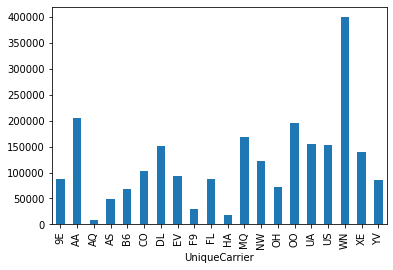

In [ ]:
flights_df.groupby('UniqueCarrier').size().plot(kind='bar');

**We can also _group by_ category/categories in order to calculate different aggregated statistics.**

**For example, finding top-3 flight codes, that have the largest total distance travelled in year 2008.**

In [ ]:
flights_df.groupby(['UniqueCarrier','FlightNum'])['Distance'].sum().sort_values(
    ascending=False).iloc[:3]

UniqueCarrier  FlightNum
UA             3            729366.0
CO             15           600402.0
               14           600402.0
Name: Distance, dtype: float64

**Another way:**

In [ ]:
flights_df.groupby(['UniqueCarrier','FlightNum'])\
  .agg({'Distance': [np.mean, np.sum, 'count'],
        'Cancelled': np.sum})\
  .sort_values(('Distance', 'sum'), ascending=False)\
  .iloc[0:3]

Distance                 Cancelled
                            mean       sum count       sum
UniqueCarrier FlightNum                                   
UA            3           2827.0  729366.0   258         4
CO            15          4962.0  600402.0   121         0
              14          4962.0  600402.0   121         0

**Number of flights by days of week and months:**

In [ ]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225


**It can also be handy to color such tables in order to easily notice outliers:**

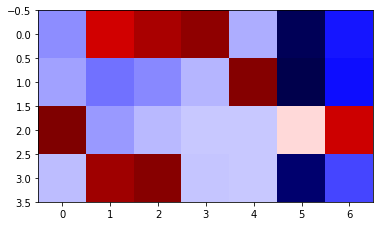

In [ ]:
plt.imshow(pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
           cmap='seismic', interpolation='none');

**Flight distance histogram:**

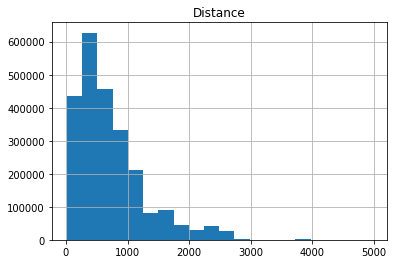

In [ ]:
flights_df.hist('Distance', bins=20);

**Making a histogram of flight frequency by date.**

In [ ]:
flights_df['Date'] = pd.to_datetime(flights_df.rename(
    columns={'DayofMonth': 'Day'})[['Year', 'Month', 'Day']])

In [ ]:
num_flights_by_date = flights_df.groupby('Date').size()

<Axes: xlabel='Date'>

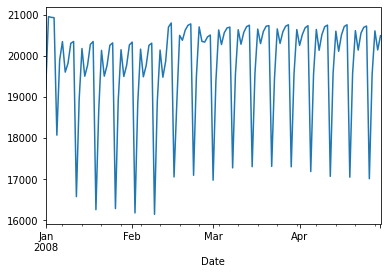

In [ ]:
num_flights_by_date.plot()

**Do you see a weekly pattern above? And below?**

<Axes: xlabel='Date'>

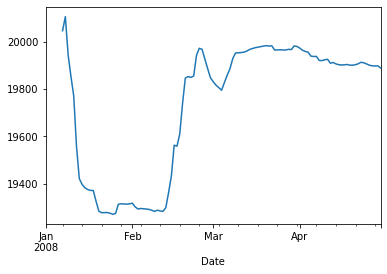

In [ ]:
num_flights_by_date.rolling(window=7).mean().plot()

### Now it's your turn. Answer the questions below.

##### The next 20 questions is going to be very tasking so get ready, but don't worry it's easy

**1. How many unique carriers are there in our dataset?**
- 10
- 15
- 20
- 25



In [ ]:
# You code here
#Question 1
flights_df['UniqueCarrier'].nunique()

20

**2. We have  both cancelled and completed flights in the datset. Check if there are more completed or cancelled flights. What is the difference?** <br>

*Hint:* Take a look at *Cancelled* to see the categories and *FlightNum* column to calculate unique flights for each category.

- Cancelled overweights completed by 329

- flightsCompleted overweights cancelled by 2260333

- flightsCancelled overweights completed by 671

- flightsCompleted overweights cancelled by 11088967 flights


In [ ]:
#Question 2
#cancelled flights =(['Cancelled'] == 1)
#completed flights = (['Cancelled'] == 0)
can_df = flights_df.groupby('Cancelled')['FlightNum'].count()
diff_of_cancelled = can_df[0] - can_df[1]
print(f"Completed overweights cancelled by {diff_of_cancelled} flights")

Completed overweights cancelled by 2260333 flights


**3. Find a flight with the longest departure delays and a flight with the longest arrival delay. Do they have the same destination airport, and if yes, what is its code?**
- yes, ATL
- yes, HNL
- yes, MSP
- no


In [ ]:
#Question 3
longest_dd = flights_df['DepDelay'].max()
longest_ad = flights_df['ArrDelay'].max()
air_code1= flights_df['Dest'][(flights_df['DepDelay'] == longest_dd)].iloc[0]
air_code2 = flights_df['Dest'][(flights_df['ArrDelay'] == longest_ad)].iloc[0]
code = air_code1
if air_code1 == air_code2:
  print(f"{code} is the code of the flight with the longest departure time({longest_dd}) and longest arrival time delay({longest_ad})")


MSP is the code of the flight with the longest departure time(2468.0) and longest arrival time delay(2460.0)


**4. Find the carrier that has the greatest number of cancelled flights.**

- AA

- MQ

- WN

- CO


In [ ]:
# You code here
#Question 4
canfl = flights_df['Cancelled'] == 1
highest_can_flg = flights_df[canfl]['UniqueCarrier'].value_counts()
index = highest_can_flg.index[0]
total_num = highest_can_flg.values[0]
print(highest_can_flg.head())
print(f"\nThe carrier with the most flights is {index} with {total_num} flights")

AA    10784
MQ     8960
OO     6773
YV     5150
UA     4616
Name: UniqueCarrier, dtype: int64

The carrier with the most flights is AA with 10784 flights


**5. Let's examine departure time (*DepTime* column). Let's see how all flights are distributed by time. For simplicity, consider distribution by hour. Which hour has the highest percentage of flights?**<br>


*Hint:* Check time format [here](https://www.transtats.bts.gov/Fields.asp?Table_ID=236).
- 1 am
- 6 am
- 11 am
- 3 pm

In [ ]:
# You code here
#Question 5
#converting the data type of flights_df to suitable one's
new = flights_df.convert_dtypes()
#changing the data type of DepTime column to string python type
flight = new.astype({'DepTime':str})

def get_time(b):
  """Function to create a 24hr format time series with string dtype
     parameter: b is the column of the dataframe that was passed for the fucntion to work with
  """
  if b == 'NaN':
    return 0
  elif b != 'NaN':
    st_b = b[0:-2]
    if (st_b >= '12') and (st_b <= '23'):
      return b[:-2]+'PM'
    elif b[:-2] == '00':
      return '12AM'
    elif b[:-2] == '24':
      return '12AM'
    else:
      return b[:-2]+'AM'

def time_format(c):
  """Function to create a 12hr format time series from a 24hrs time series with string dtype
     parameter: c is the column of the dataframe that was passed for the fucntion to work with 
     body: an if-elif-else statement is used to check for various condition to 
     determine if a record is AM or PM
     return: the time in a correct 12hr format is returned """

  k = c[:-2]

  if k == '13':
    return '1PM'
  elif k == '14':
    return '2PM'
  elif k == '15':
    return '3PM'
  elif k == '16':
    return '4PM'
  elif k == '17':
    return '5PM'
  elif k == '18':
    return '6PM'
  elif k == '19':
    return '7PM'    
  elif k == '20':
    return '8PM'
  elif k == '21':
    return '9PM'
  elif k == '22':
    return '10PM'
  elif k == '23':
    return '11PM'
  else:
    return c


flights_df['12hr_TimeFormat'] = flight['DepTime'].apply(get_time)

flights_df['12hr_TimeFormat'] = flights_df['12hr_TimeFormat'].apply(time_format)

distinct = flights_df['12hr_TimeFormat'].value_counts()
percent_time = (distinct/sum(distinct))*100
print(f"The hour with the highest percentage of flights is {percent_time.idxmax()} with a percentage of {percent_time.max():1f}%")


The hour with the highest percentage of flights is 6AM with a percentage of 6.303027%


**6. OK, now let's examine cancelled flight distribution by month. Which month has the least percentage of cancelled flights?**<br>

- 4
- 9
- 10
- 2

In [ ]:
# You code here
#Question 6

fl_cancelled = flights_df[flights_df['Cancelled'] == 1]
count = fl_cancelled['Month'].value_counts()
percent_month = (count/sum(fl_cancelled['Month']))*100
print(f"The month with the least percentage of cancelled flights is {percent_month.idxmin()} with a percentage of {percent_month.min():2f}%")

The month with the least percentage of cancelled flights is 4 with a percentage of 6.974520%


**7. Is there any month that didn't have any cancelled flights at all? Check all that apply.**

- 5
- 12
- 3
- 7

In [ ]:
# You code here
#Question 7
flights_df.head()
fl_cancel = flights_df[flights_df['Cancelled'] == 1]
count = fl_cancel['Month'].unique()
print(f"the months that have cancelled flights are: {list(count)}")

the months that have cancelled flights are: [1, 2, 3, 4]


**8. Find the busiest hour, or in other words, the hour when the number of departed flights reaches its maximum.**<br>


*Hint:* Consider only *completed* flights.

- 4
- 6
- 8
- 17

In [ ]:
# You code here
#Question 8
hour = flights_df['Cancelled'] == 0
hour_highest_count = flights_df[hour]['DepTime'].value_counts().head().index[0]#[:-2]
hour_highest_count

600.0

**9. Since we know the departure hour, it might be interesting to examine the average delay for corresponding hour. Are there any cases, when the planes on average departed earlier than they should have done? And if yes, at what departure hours did it happen?**<br>

*Hint:* Consider only *completed* flights.

- no, there are no such cases
- yes, at 5-7 am
- yes, at 9-11 am
- yes, at 1-3 pm

In [ ]:
#Question 9
flights_completed_df = flights_df[flights_df['Cancelled'] == 0]
l = pd.DataFrame(flights_completed_df.groupby('12hr_TimeFormat')['DepDelay'].mean())
time_of_avgDD = l[l['DepDelay'].values < 1]
time_of_avgDD

,DepDelay
12hr_TimeFormat,
5AM,-4.332031
6AM,-1.343750
7AM,0.755371


**10. Considering only the completed flights by the carrier, that you have found in Question 3, find the distribution of these flights by hour. At what time does the greatest number of its planes depart?**<br>

*Hint:* Consider *all* flights.

- at noon
- at 6 am
- at 8 pm
- at 9 am

In [ ]:
#Question 10
completed_f = flights_df['Cancelled'] == 0
flights_df[completed_f & (flights_df['UniqueCarrier'] == 'WN')]['12hr_TimeFormat'].value_counts().head()


6AM     27475
7AM     27447
10AM    25919
8AM     25501
7PM     24969
Name: 12hr_TimeFormat, dtype: int64

**11. Find top-10 carriers in terms of the number of *completed* flights (_UniqueCarrier_ column)?**

**Which of the listed below is _not_ in your top-10 list?**

- DL
- AA
- OO
- EV

In [ ]:
# You code here
#Question 11
#completed_f is a variable that stores the boolean value of flight that was completed

flights_df[completed_f]['UniqueCarrier'].value_counts().head(10)

WN    394586
AA    193735
OO    188411
MQ    158900
US    151149
UA    149420
DL    148358
XE    134832
NW    121392
CO    101618
Name: UniqueCarrier, dtype: int64

**12. Plot distributions of flight cancellation reasons (_CancellationCode_).**

**What is the most frequent reason for flight cancellation? (Use this [link](https://www.transtats.bts.gov/Fields.asp?Table_ID=236) to translate codes into reasons)**

- Carrier
- Weather conditions
- National Air System
- Security reasons

#### A -  *Carrier*
#### B -  *Weather*
#### C - *National Air System*
#### D - Security

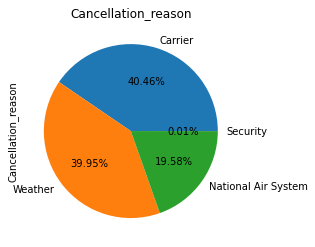

In [ ]:
# You code here
#Question 12
def canc_reason(flights_df):
    if flights_df['CancellationCode'] == 'A':
        return 'Carrier'
    elif flights_df['CancellationCode'] == 'B':
        return 'Weather'
    elif flights_df['CancellationCode'] == 'C':
        return 'National Air System'
    elif flights_df['CancellationCode'] == 'D':
      return 'Security'
    else:
      return flights_df['CancellationCode']
flights_df['Cancellation_reason'] = flights_df.apply(canc_reason,axis=1)
f_cancel_code = flights_df['Cancellation_reason'].value_counts()
f_cancel_code.plot(kind='pie',autopct='%1.2f%%')
plt.title('Cancellation_reason')
plt.show()

**13. Which route is the most frequent, in terms of the number of flights?**

*Hint: Take a look at _'Origin'_ and _'Dest'_ features. Consider _A->B_ and _B->A_ directions as _different_ routes)*

 - New-York – Washington (JFK-IAD)
 - San-Francisco – Los-Angeles (LAX-SFO)
 - San-Jose – Dallas (SJC-DFW)
 - New-York – San-Francisco (JFK-SFO)

In [ ]:
#Question 13
#Create two columns that have the flights route based on different directions i.e Origin->Dest,Dest->Origin
flights_df['route_origin-dest'] = flights_df['Origin']+'-'+flights_df['Dest']
flights_df['route_dest-origin'] = flights_df['Dest']+'-'+flights_df['Origin']

print(flights_df[['route_dest-origin','route_origin-dest']].value_counts().head())

route_dest-origin  route_origin-dest
LAX-SFO            SFO-LAX              4686
SFO-LAX            LAX-SFO              4557
HNL-OGG            OGG-HNL              4321
OGG-HNL            HNL-OGG              4198
LAS-LAX            LAX-LAS              4142
dtype: int64


**14. Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.**

_Hint_: consider only positive delays


In [ ]:
# fd = flights_df[(flights_df['DepDelay'] > 15) & (flights_df['WeatherDelay'] > 15)]['route_dest-origin'].value_counts().head()
# l_of_index1 = fd.index
# fo = flights_df[(flights_df['DepDelay'] > 15) & (flights_df['WeatherDelay'] > 15)]['route_origin-dest'].value_counts().head()
# l_of_index2 = fd.index
# x = flights_df[(flights_df['route_dest-origin'].isin(l_of_index1))] #& (flights_df['route_dest-origin'].isin(l_of_index1))]
# y = flights_df[(flights_df['route_origin-dest'].isin(l_of_index2))] #& (flights_df['route_origin-dest'].isin(l_of_index2))]
# s_x = x[x['WeatherDelay'] > 15]['route_dest-origin'].count()
# s_y = y[y['WeatherDelay'] > 15]['route_origin-dest'].count()
# # s_x + s_y
# s_x

In [ ]:
# from pandas.core.strings.accessor import F
# fd = flights_df[(flights_df['DepDelay'] > 0)]['route_dest-origin'].value_counts().head()
# l_of_index1 = fd.index
# fo = flights_df[(flights_df['DepDelay'] > 0)]['route_origin-dest'].value_counts().head()
# l_of_index2 = fd.index
# x = flights_df[(flights_df['route_dest-origin'].isin(l_of_index1))] #& (flights_df['route_dest-origin'].isin(l_of_index1))]
# y = flights_df[(flights_df['route_origin-dest'].isin(l_of_index2))] #& (flights_df['route_origin-dest'].isin(l_of_index2))]
# s_x = x[x['WeatherDelay'] > 0]['FlightNum'].count().sum()
# s_y = y[y['WeatherDelay'] > 0]['FlightNum'].count().sum()
# s_x + s_y

**15. Examine the hourly distribution of departure times. For that, create a new series from DepTime, removing missing values.**


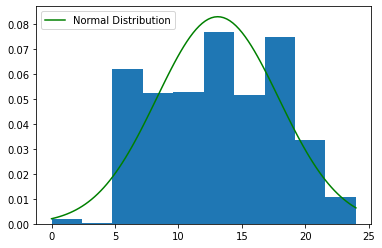

In [ ]:
from scipy.stats import norm

new_flights_df = flights_df.copy(deep=True)
new_flights_df['hour_distri'] = new_flights_df['DepTime']
new_flights_df.dropna(subset=['hour_distri'],inplace=True)
#convert the data type to suitable type
new_flights_df.convert_dtypes()
new_flights_df['hour_distri'] = new_flights_df['hour_distri'].astype(object)
new_flights_df['hour_distri'] = new_flights_df['hour_distri'].astype(int)
new_flights_df['hour_distri'] = new_flights_df['hour_distri'].astype(str)
#applying a function to extract only the hour 
new_flights_df['hour_distri'] = new_flights_df['hour_distri'].apply(lambda x: x.zfill(4))
new_flights_df['hour_distri'] = new_flights_df['hour_distri'].apply(lambda x: x[:2])
new_flights_df['hour_distri'] = new_flights_df.hour_distri.astype(int)
# Generate histogram of new_flights_df['hour_distri'] column
plt.hist(new_flights_df['hour_distri'], density=True)

# Calculate the mean and standard deviation of new_flights_df['hour_distri'] column
mean = new_flights_df['hour_distri'].mean()
stdev = new_flights_df['hour_distri'].std()

# Generate x-axis values
x = np.linspace(new_flights_df['hour_distri'].min(), new_flights_df['hour_distri'].max(), 100)

# Generate y-axis values for normal distribution with same mean and standard deviation as 'hour' column
y = norm.pdf(x, mean, stdev)

# Plot the line representing theoretical normal distribution
plt.plot(x, y, 'g-', label='Normal Distribution')

# Add legend
plt.legend()

# Show plot
plt.show()

**16. Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.**

_Hint_: Look for official meteorological winter months for the Nothern Hemisphsere.
Choose all correct statements:

- The number of flights during weekends is less than during weekdays (working days).
- The lowest number of flights is on Sunday.
- There are less flights during winter than during summer.tion 1

In [ ]:
def get_month_name(flights_df):
  if flights_df['Month'] == 1:
    return 'January'
  elif flights_df['Month'] == 2:
    return 'February'
  elif flights_df['Month'] == 3:
    return 'March'
  elif flights_df['Month'] == 4:
    return 'April'
flights_df['months_name'] = flights_df.apply(get_month_name, axis=1)

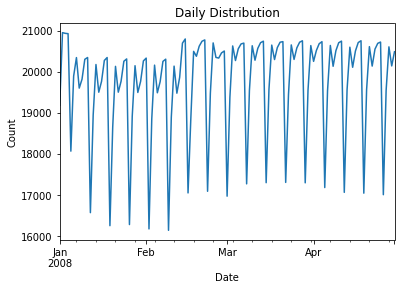

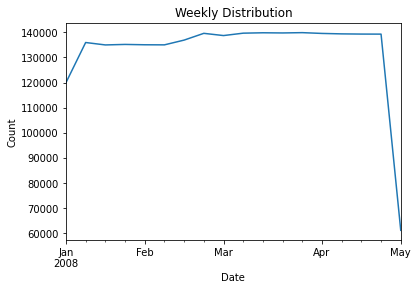

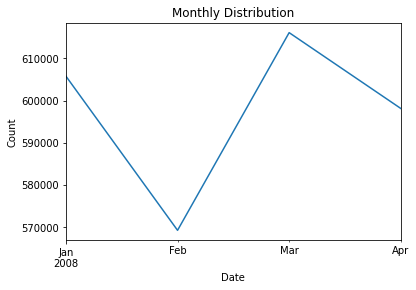

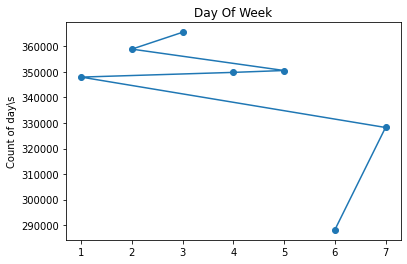



From the visualization above, we can infer the following:
1.The number of flights during weekends is less than that of weekdays
2.Saturday has the lowest number of flights



In [ ]:
#Question 16
plt.title('Daily Distribution')
plt.ylabel('Count')
flights_df.groupby('Date').size().plot()
plt.show()
print()
plt.title('Weekly Distribution')
plt.ylabel('Count')
flights_df.groupby(pd.Grouper(key='Date', freq='W')).size().plot()
plt.show()
print()
plt.title('Monthly Distribution')
plt.ylabel('Count')
flights_df.groupby(pd.Grouper(key='Date', freq='M')).size().plot()
plt.show()
print()

#plotting of graph to show changes of flight through different time
plt.title('Day Of Week')
plt.ylabel('Count of day\s')
plt.plot(flights_df['DayOfWeek'].value_counts(),marker='o')
plt.show()

print("""\n\nFrom the visualization above, we can infer the following:
1.The number of flights during weekends is less than that of weekdays
2.Saturday has the lowest number of flights
""")

**17. Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.**


<Axes: xlabel='Month', ylabel='Cancellation_reason'>

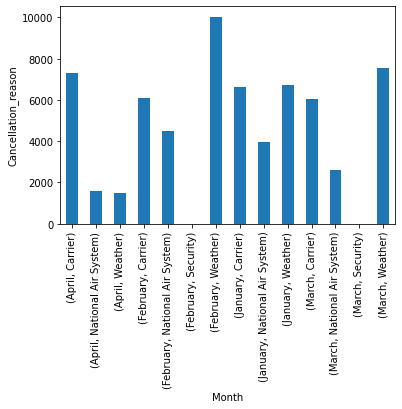

In [ ]:
#Question 17

flights_df.groupby(['months_name','Cancellation_reason'])['Cancellation_reason'].size().plot(kind='bar',ylabel = 'Cancellation_reason',xlabel='Month')

**18. Which month has the greatest number of cancellations due to Carrier?** 


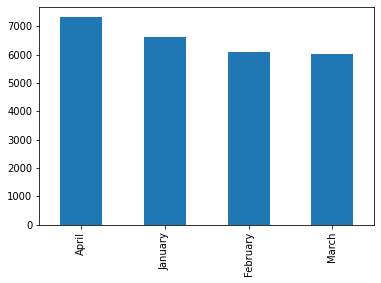

In [ ]:
# You code here
#Question 18
flights_df[flights_df['Cancellation_reason'] == 'Carrier']['months_name'].value_counts().plot(kind='bar')
plt.show()


**19. Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.**


<Axes: >

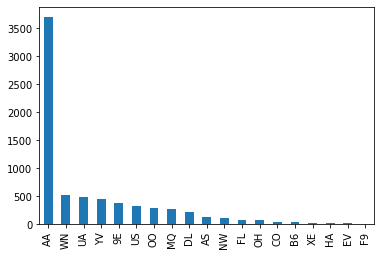

In [ ]:
# You code here
#Question 19
flights_df[(flights_df['Cancellation_reason'] == 'Carrier') & (flights_df['months_name'] == 'April')]['UniqueCarrier'].value_counts().plot(kind='bar')

**20. Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures? Leave only non-negative values of delay times ('ArrDelay', 'DepDelay').
([Boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html) can be helpful in this exercise, as well as it might be a good idea to remove outliers in order to build nice graphs. You can exclude delay time values higher than a corresponding .95 percentile).**


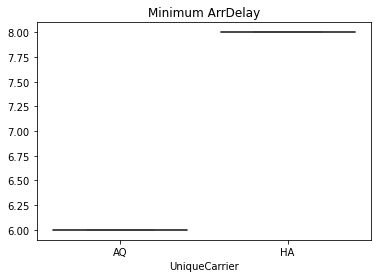

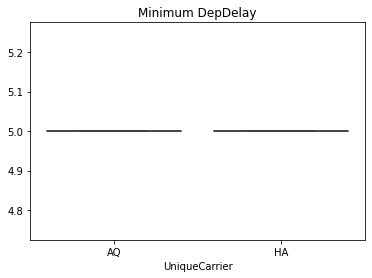


Carrier with the lowest median arrival delay and departure delay with ArrDelay of (6.0) and lowest departure delay of (5.0) is  AQ
               ArrDelay  DepDelay
UniqueCarrier                    
AQ                  6.0       5.0
HA                  8.0       5.0
WN                 13.0      15.0
F9                 14.0      11.0
DL                 17.0      13.0


In [ ]:
#Question 20
# only keep flights with non-negative delay times
non_neg_delay_flight = flights_df[(flights_df['ArrDelay'] >= 0) & (flights_df['DepDelay'] >= 0)]

# exclude delay time values higher than a corresponding .95 percentile
max_threshold = np.percentile(non_neg_delay_flight[['ArrDelay', 'DepDelay']], 95, axis=0)
df = non_neg_delay_flight[(non_neg_delay_flight['ArrDelay'] <= max_threshold[0]) & 
                        (non_neg_delay_flight['DepDelay'] <= max_threshold[1])]
#the median of ArrDelay and DepDelay grouped by UniqueCarrier
median_delay = df.groupby('UniqueCarrier')[['ArrDelay','DepDelay']].median()
med = pd.DataFrame(median_delay)
min_arr = med['ArrDelay'].min()
min_dep = med['DepDelay'].min()
pl = med[(med.values == min_arr) | (med.values == min_dep)]

#create a boxplot of carrier with the lowest median arrival delay
sns.boxplot(x=pl.index,y=pl['ArrDelay'].values)
plt.title('Minimum ArrDelay')
plt.show()
print()
#create a boxplot of carrier with the lowest departure delays
sns.boxplot(x=pl.index,y=pl['DepDelay'].values)
plt.title('Minimum DepDelay')
plt.show()

print(f"\nCarrier with the lowest median arrival delay and departure delay with ArrDelay of ({pl.ArrDelay.values[0]}) and lowest departure delay of ({pl.DepDelay.values[0]}) is  {pl.index[0]}")
print(med.groupby('UniqueCarrier').min().sort_values(by="ArrDelay").head())

That's it! Now go and do 30 push-ups! :). You are now a guru in Data Manipulation and Analysis with Python